# Packages

In [27]:
import matplotlib.pyplot as plt
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import numpy as np
from rpy2.robjects import r, pandas2ri

%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython


import sys
sys.path.append('/home/divar/projects/geometric-sampling')
import geometric_sampling

import geometric_sampling as gs
from geometric_sampling.search.astar import AStar
from geometric_sampling.design import Design
from geometric_sampling.criteria.var_nht import VarNHT

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [28]:
%%R
#install.packages("sampling")
library(sampling)

# Reading Data

In [29]:
# Python cell ----

import pandas as pd

# Read config file
params = pd.read_csv("config_origin.csv")

# Extract all columns as regular Python variables (from row 0)
for col in params.columns:
    globals()[col] = params.at[0, col]

# Now you have: bardia_balance_method, num_new_nodes, ... etc. as plain Python variables

In [30]:
%%R
# Read regular data (returns data.frame)

df <- read.csv("cor_zy_9.5_py_0.csv")

y   <- df$y
z   <- df$z
pik <- df$pik

# Read "extra" data (returns data.frame of one row; use as.list to extract)
extra <- read.csv("cor_zy_9.5_py_0_extra.csv")
 list2env(extra, .GlobalEnv)


<environment: R_GlobalEnv>


# Astar

5000 30 200000 0.1 0.9


Generating initial designs:   1%|            | 31/3000 [00:00<00:09, 308.48it/s]

Initial design 0: method = Original, efficiency z = 0.1503, y=0.4291
New best at idx=0: method = Original, efficiency z = 0.1503 and efficiency y = 0.4291
New best at idx=2: method = z/pi, efficiency z = 0.1503 and efficiency y = 0.4291
New best at idx=3: method = swap, efficiency z = 0.1722 and efficiency y = 0.3573
New best at idx=9: method = swap, efficiency z = 0.1812 and efficiency y = 0.4688


Generating initial designs:   7%|▋          | 203/3000 [00:00<00:08, 330.70it/s]

New best at idx=146: method = swap, efficiency z = 0.1876 and efficiency y = 0.5397
New best at idx=190: method = swap, efficiency z = 0.2166 and efficiency y = 0.9010


Generating initial designs:  73%|███████▎  | 2189/3000 [00:06<00:01, 508.85it/s]

New best at idx=2114: method = z_family, efficiency z = 0.2673 and efficiency y = 2.2191
New best at idx=2116: method = z_family, efficiency z = 0.2840 and efficiency y = 0.6565
New best at idx=2187: method = z_family, efficiency z = 0.3098 and efficiency y = 0.5079
New best at idx=2211: method = z_family, efficiency z = 0.3851 and efficiency y = 1.0957


Generating initial designs:  81%|████████  | 2428/3000 [00:07<00:01, 407.85it/s]

New best at idx=2382: method = z_family, efficiency z = 0.4824 and efficiency y = 0.7132


Generating initial designs:  87%|████████▋ | 2596/3000 [00:07<00:00, 512.22it/s]

New best at idx=2502: method = z_family, efficiency z = 0.4949 and efficiency y = 1.0673


Generating initial designs: 100%|██████████| 3000/3000 [00:08<00:00, 363.34it/s]



Progress: 0.0% 
=== Best Solution Updated at Iteration 1 ===
  Balancing Method:    origine
  Real and E(.) z,y:   50171.04→50171.04, 10043.62→10043.62
  Best Cost (z):       124635.978
  Best Cost (y):       9222.8042
  number of new noded: 30
  rho (z, y):          0.951
  rho (z_hat, y_hat):  0.951
  rho (p, y):          0.0
  Criteria Value:      124635.978
  Efficiency z (0→f):  0.15 → 0.495 → dsd 0.5594→ cube 2.3403
  Efficiency y (0→f):  0.429 → 1.067 → dsd 1.027→ cube 1.88
  Efficiency z (srs):  5.521 → 0.495 → 20.5549
  Efficiency y (srs):  4.023 → 1.067 → 9.6289
  Alpha:               None
  Num changes:         None
  Design Depth:        6
  Design Size (|D|):   22
  Open set size:       158

Progress: 0.6% 
=== Best Solution Updated at Iteration 30 ===
  Balancing Method:    origine
  Real and E(.) z,y:   50171.04→50171.04, 10043.62→10043.62
  Best Cost (z):       90133.468
  Best Cost (y):       8407.9902
  number of new noded: 30
  rho (z, y):          0.951
  rho (z_ha

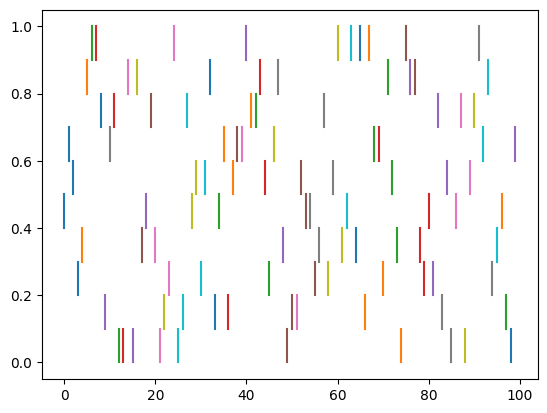

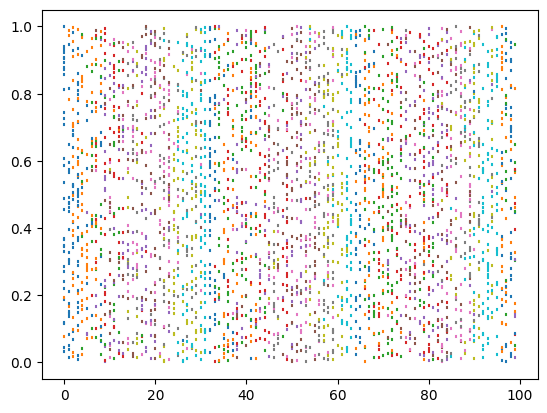

In [31]:
y = np.array(ro.r['y'])
z = np.array(ro.r['z'])
n = np.array(ro.r['n'])
N = np.array(ro.r['N'])

inclusions = np.array(ro.r['pik'])

threshold_z = float(ro.r['var_ht_z'][0])
threshold_y = float(ro.r['var_ht_y'][0])

threshold_z_cube = float(ro.r['var_cube_z'][0])
threshold_y_cube = float(ro.r['var_cube_y'][0])

inclusions = np.array(inclusions)



rng = np.random.default_rng()  # Recommended for controlled/stable random runs

print(max_iterations, num_new_nodes, max_open_set_size, switch_lower, switch_upper)

criterion = VarNHT(main_variable=y, auxiliary_variable=z, 
                   inclusion_probability=inclusions, balance_method=bardia_balance_method)

astar = AStar(
    inclusions              = inclusions,
    num_initial_nodes       = num_initial_nodes,
    initial_design_to_use   = initial_design_to_use,
    criteria                = criterion,
    z                       = z,
    y                       = y,
    threshold_z             = threshold_z,
    threshold_y             = threshold_y,
    threshold_z_cube             = threshold_z_cube,
    threshold_y_cube             = threshold_y_cube,
    switch_lower            = switch_lower,
    switch_upper            = switch_upper,
    num_changes_lower       = num_changes_lower,
    num_changes_upper       = num_changes_upper,
    show_results            = show_results,
    var_percent_exected     = var_percent_exected,
    swap_iterations         = swap_iterations,
    swap_distance           = swap_distance,
    swap_units              = swap_units,
    rng                     = rng,                         
)

result = astar.run(
    max_iterations             = max_iterations,
    num_new_nodes              = num_new_nodes,
    max_open_set_size          = max_open_set_size,
    random_restart_period      = random_restart_period,
    random_injection_count     = random_injection_count,
    prune_fraction             = prune_fraction,
    num_top_restart_nodes      = num_top_restart_nodes,
    stuck_fraction             = stuck_fraction,

)

print("Best criteria value:", astar.best_criteria_value)
print("Iterations run:", result)
print("Best criteria value:", astar.best_criteria_value)
print("Iterations run:", result)
# print(np.round(var_z_0, 1))
# print(np.round(var_y_0, 1))
astar.initial_design.show()
astar.best_design.show()

In [32]:
import pandas as pd
print("size of init design",len(list(astar.initial_design)))
print("size of best design", len(list(astar.best_design)))
#print(astar.initial_design.criteria_value())
print(astar.criteria(astar.initial_design))
print(astar.criteria(astar.best_design))
print(N)
sum_inclusion_last = 0
sum_inclusion_init = 0
for k in range(int(N)):
    size_last = 0
    prob_last = 0
    len_last = 0
    prob_last_second = 0
    prob = 0
    z_ests = []
    y_ests = []
    probs  = []
    for item in astar.best_design:
        prob += item.probability
        size_last += 1
        len_last += len(item.ids)
        probs.append(item.probability)
        ids = np.array(list(item.ids), dtype=int)
        z_ests.append(np.sum(z[ids]/inclusions[ids]))
        y_ests.append(np.sum(y[ids]/inclusions[ids]))
            
        if k in item.ids:
            
            #print(np.round(np.sum(y[ids]/inclusions[ids])), np.round(np.sum(z[ids]/inclusions[ids])))
            prob_last += item.probability
            if k+1 in item.ids:
                prob_last_second += item.probability
    sum_inclusion_last += prob_last
        #print(item)
    size_ini = 0
    prob_ini = 0
    len_ini = 0
    prob_ini_second = 0
    for item in astar.initial_design:
        len_ini += len(item.ids)
        size_ini += 1
        if k in item.ids:
            #print(item.probability)
            prob_ini += item.probability
            if k+1 in item.ids:
                prob_ini_second += item.probability
    sum_inclusion_init += prob_ini
    
        #print(item)
    #print(np.round(prob_last, 3), np.round(prob_ini, 3), np.round(inclusions[k], 3))
    if  not (len_last%n == 0 and len_ini%n == 0 and 
        np.round(prob_last, 3) == np.round(prob_ini, 3) and 
        np.round(prob_last, 3) == np.round(inclusions[k], 3)):
        print('yessssss')
print('sum of inclusions, last ini and original', sum_inclusion_last, sum_inclusion_init, sum(inclusions))
print(prob)
print('n = ', n)
#print(pd.concat([pd.Series(z_ests), pd.Series(y_ests), pd.Series(probs)], axis=1))
y_ests = np.array(y_ests)
z_ests = np.array(z_ests)
probs = np.array(probs)
print(np.sum(y), np.sum(z), np.sum(y_ests*probs), np.sum(z_ests*probs))
print(np.sum(y), np.sum(z), np.sum(y_ests*probs), np.sum(z_ests*probs))
print('var z estimates', np.round(np.sum(z_ests**2*probs)-np.sum(z_ests*probs)**2, 3))
print('var y estimates', np.round(np.sum(y_ests**2*probs)-np.sum(y_ests*probs)**2, 3))

size of init design 10
size of best design 2418
140896.7937816156
68215.74572649569
[100]


/tmp/ipykernel_280788/683604881.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for k in range(int(N)):


sum of inclusions, last ini and original 9.999999999999982 9.99999999999998 9.99999999999998
1.000000000000001
n =  [10]
10043.617183059716 50171.044381539425 10043.617183059718 50171.04438153941
10043.617183059716 50171.044381539425 10043.617183059718 50171.04438153941
var z estimates 68215.746
var y estimates 9008.846
